In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
data = pd.read_csv('/content/MortalityStatus_Data.csv')
data.head(2)

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,0.974359,0,0,0,0,1,3,1,0.367442,1,1,0.383333,0.000000,0
1,0.512821,0,1,1,2,0,2,1,0.511628,1,1,0.216667,0.088889,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3262 entries, 0 to 3261
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3262 non-null   float64
 1   Sex                     3262 non-null   int64  
 2   T_Stage                 3262 non-null   int64  
 3   N_Stage                 3262 non-null   int64  
 4   6th_Stage               3262 non-null   int64  
 5   Differentiated          3262 non-null   int64  
 6   Grade                   3262 non-null   int64  
 7   A_Stage                 3262 non-null   int64  
 8   Tumor_Size              3262 non-null   float64
 9   Estrogen_Status         3262 non-null   int64  
 10  Progesterone_Status     3262 non-null   int64  
 11  Regional_Node_Examined  3262 non-null   float64
 12  Reginol_Node_Positive   3262 non-null   float64
 13  Mortality_Status        3262 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 3

In [4]:
data.describe()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
count,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000,3262.000000
mean,0.614312,0.005212,0.651747,0.213673,0.900061,0.690374,2.116493,0.993256,0.468886,0.945432,0.842428,0.200613,0.031296,0.113121
std,0.228478,0.072014,0.676496,0.425379,0.859212,1.039732,0.629377,0.081859,0.067208,0.227169,0.364395,0.118616,0.040220,0.316789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.353488,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.435897,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.418605,1.000000,1.000000,0.116667,0.000000,0.000000
50%,0.615385,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.451163,1.000000,1.000000,0.200000,0.022222,0.000000
75%,0.794872,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,0.497674,1.000000,1.000000,0.283333,0.044444,0.000000
max,1.000000,1.000000,3.000000,2.000000,4.000000,3.000000,4.000000,1.000000,0.674419,1.000000,1.000000,0.550000,0.155556,1.000000


In [5]:
data.shape

(3262, 14)

In [6]:
data.isnull().sum()

,0
Age,0
Sex,0
T_Stage,0
N_Stage,0
6th_Stage,0
Differentiated,0
Grade,0
A_Stage,0
Tumor_Size,0
Estrogen_Status,0


In [7]:
x = data.drop(['Mortality_Status'],axis=1)
y = data['Mortality_Status']

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [23]:
x_train.shape

(2283, 13)

In [24]:
x_test.shape

(979, 13)

In [25]:
def model_acc(model):
  model.fit(x_train,y_train)
  acc = model.score(x_test,y_test)
  print(str(model)+ ' --> ' + str(acc))

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_acc(lr)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model_acc(dt)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_acc(rf)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model_acc(knn)

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model_acc(nb)

LogisticRegression() --> 0.8692543411644535
DecisionTreeClassifier() --> 0.7987742594484167
RandomForestClassifier() --> 0.8631256384065373
KNeighborsClassifier() --> 0.8610827374872319
GaussianNB() --> 0.822267620020429


In [27]:
from sklearn.model_selection import GridSearchCV

## Logistic Regression Model

In [47]:
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200],
    'l1_ratio': [0.1, 0.5]
}

grid_search = GridSearchCV(estimator=lr, param_grid=parameters, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
bestModelLogistic = grid_search.best_estimator_
bestModelLogistic

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_

LogisticRegression(C=0.1, l1_ratio=0.1, solver='saga')

In [28]:
y_pred_lr = lr.predict(x_test)

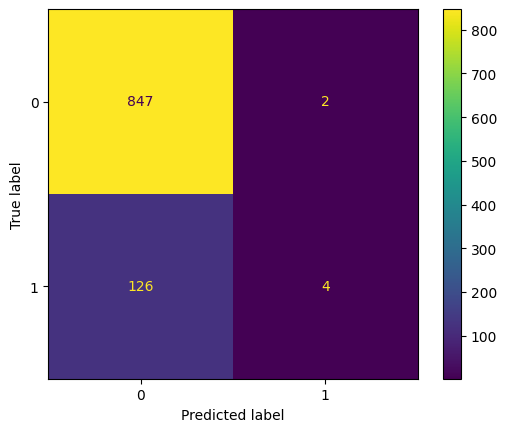

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test,y_pred_lr)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       849
           1       0.67      0.03      0.06       130

    accuracy                           0.87       979
   macro avg       0.77      0.51      0.49       979
weighted avg       0.84      0.87      0.81       979



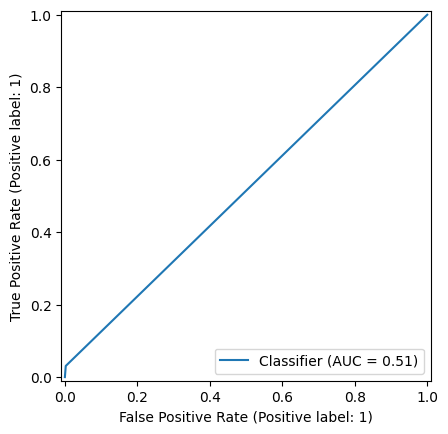

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

roc_auc_score(y_test,y_pred_lr)
RocCurveDisplay.from_predictions(y_test,y_pred_lr)

## K - Nearest Neighbour models

In [33]:
param_grid = {'n_neighbors': np.arange(1, 25), 'metric': ['euclidean', 'manhattan']}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [35]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 11}

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11, metric='manhattan')
model_acc(knn)

KNeighborsClassifier(metric='manhattan', n_neighbors=11) --> 0.8661899897854954


In [38]:
y_pred_knn = knn.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_knn)

0.8661899897854954

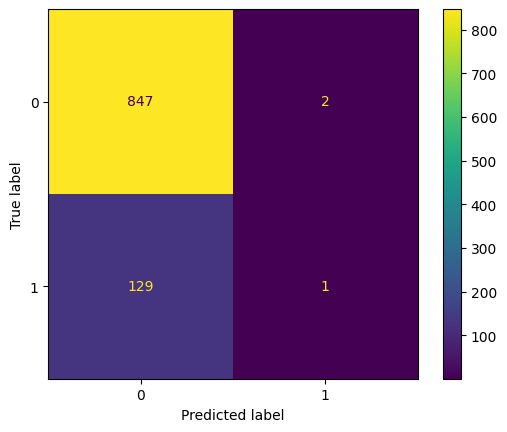

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test,y_pred_knn)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn)

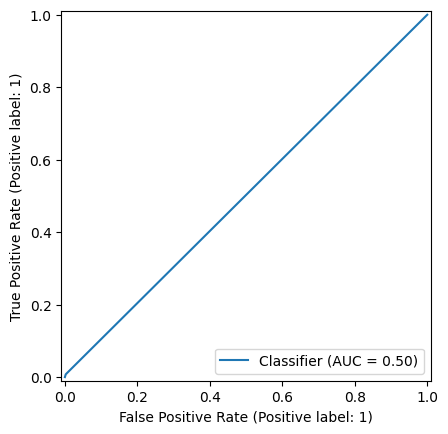

In [57]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,y_pred_knn)

# Naïve Bayes

In [40]:
parameters = {
    'var_smoothing' : [1e-9, 1e-8, 1e-7],
    'priors': [None, [0.5, 0.5], [0.4, 0.6]]
}

grid_search = GridSearchCV(estimator=nb, param_grid=parameters, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
bestModelNB = grid_search.best_estimator_
bestModelNB


GaussianNB(var_smoothing=1e-07)

In [41]:
bestModelNB.predict(x_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

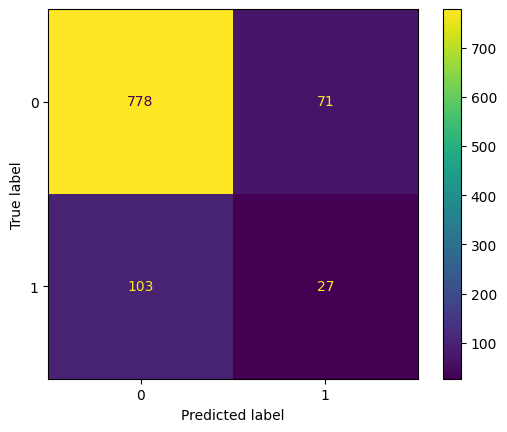

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test,bestModelNB.predict(x_test))
ConfusionMatrixDisplay.from_predictions(y_test,bestModelNB.predict(x_test))

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,bestModelNB.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       849
           1       0.28      0.21      0.24       130

    accuracy                           0.82       979
   macro avg       0.58      0.56      0.57       979
weighted avg       0.80      0.82      0.81       979



In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,bestModelNB.predict(x_test))

0.822267620020429

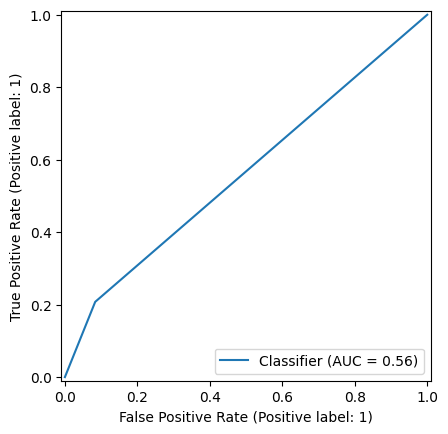

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

roc_auc_score(y_test,bestModelNB.predict(x_test))
RocCurveDisplay.from_predictions(y_test,bestModelNB.predict(x_test))